Fig.1

与图一相同，但是使用不同的CH4浓度驱动

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import seaborn as sns

In [8]:
from palettable.colorbrewer.diverging import RdBu_11
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [9]:
import statsmodels.api as sm

In [24]:
# 敏感性实验数据

data_matrix = np.array([
                [10.4296,11.7947,11.9394,12.0855,12.2329],
                [11.0233,11.1529,11.2839,11.4162,11.5499],
                [10.5715,10.6912,10.8123,10.9346,11.0583],
                [10.1910,10.3026,10.4154,10.5295,10.6449],
                [9.8758 ,9.9807 ,10.0868,10.1942,10.3027]
              ])
data_matrix_VOC = np.array([
                [12.1326,12.1592,12.1858,12.2127,12.2396],
                [11.4650,11.4872,11.5095,11.5320,11.5545],
                [10.9839,11.0031,11.0225,11.0225,11.0615],
                [10.5786,10.5955,10.6126,10.6297,10.6469],
                [10.2427,10.2579,10.2732,10.2885,10.3040]
              ])

NO_emi  = np.array([18.0 ,26.9 ,35.9 ,44.9 ,53.9 ])
CO_emi  = np.array([130.2,195.3,260.4,325.5,390.6])
VOC_emi = np.array([97.5 ,137.5,177.4,217.4,257.4])

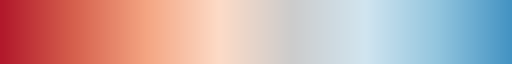

In [25]:
temp = RdBu_11.mpl_colors
temp[5] = (0.8,0.8,0.8)
# newcmp = LinearSegmentedColormap.from_list('RdBu_11',RdBu_11.mpl_colors)
newcmp = LinearSegmentedColormap.from_list('RdBu_11',temp[1:-2])
newcmp

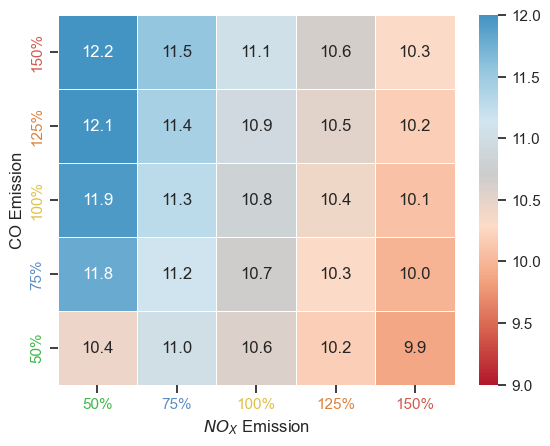

In [26]:
f, ax = plt.subplots()
sns.heatmap(data_matrix.T[::-1,:], annot=True,fmt='.1f', linewidths=.5, ax=ax, cmap=newcmp,
           vmin=9, vmax=12)
ax.set_xlabel('$NO_X$ Emission')
ax.set_ylabel('CO Emission')

line_color = ['#D0594E','#DB833E','#DFC147','#5C8DC6','#42B64A']
labels = ['50%','75%','100%','125%','150%']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])

for i in range(5):
    ax.get_xticklabels()[i].set_color(line_color[4-i])
    ax.get_yticklabels()[i].set_color(line_color[i])
f.savefig('附件/甲烷/敏感性矩阵1.pdf',dpi=300)

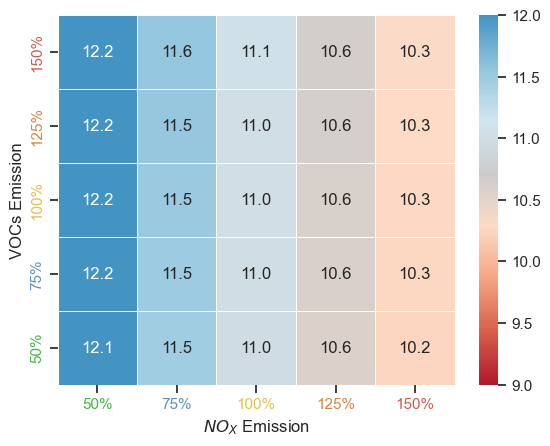

In [27]:
f, ax = plt.subplots()
sns.heatmap(data_matrix_VOC.T[::-1,:], annot=True,fmt='.1f', linewidths=.5, ax=ax, cmap=newcmp,
           vmin=9, vmax=12)
ax.set_xlabel('$NO_X$ Emission')
ax.set_ylabel('VOCs Emission')

line_color = ['#D0594E','#DB833E','#DFC147','#5C8DC6','#42B64A']
labels = ['50%','75%','100%','125%','150%']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])

for i in range(5):
    ax.get_xticklabels()[i].set_color(line_color[4-i])
    ax.get_yticklabels()[i].set_color(line_color[i])
f.savefig('附件/甲烷/敏感性矩阵2.pdf',dpi=300)

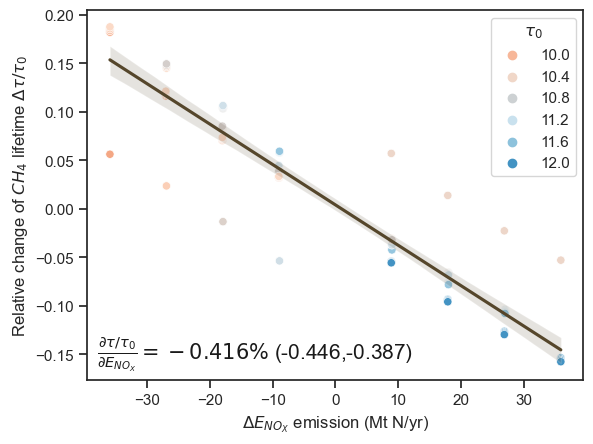

In [28]:
x_list = []
y_list = []
lifetime_0 = []
for k in range(len(CO_emi)):
    for i in range(len(NO_emi)):
        for j in range(len(NO_emi)):
            if not j==i: ##单次比较即可
                x_list.append(NO_emi[j]-NO_emi[i])
                y_list.append((data_matrix[j,k]-data_matrix[i,k])/data_matrix[i,k])
                lifetime_0.append(data_matrix[i,k])
data = {
        'x':x_list,
        'y':y_list,
        '$τ_0$':lifetime_0
    }      

fig, ax = plt.subplots()
sns.set_theme(style="ticks")



# sns.scatterplot(x=x_list, y=y_list,hue=lifetime_0)
sns.scatterplot(data=data,x='x', y='y',hue='$τ_0$',palette=newcmp,hue_norm=(9,12))
sns.regplot(x=x_list, y=y_list,ax=ax,scatter_kws={"s":0},
            color='#55462B',
           )
ax.set_xlabel('$\Delta E_{NO_X}$ emission (Mt N/yr)')
ax.set_ylabel(r'Relative change of $CH_4$ lifetime $\Delta \tau/\tau_0$')

ax.text(-38,-0.155,r'$ \frac {\partial \tau/\tau_0}{\partial E_{NO_X}}=-0.416\%$ (-0.446,-0.387)',fontsize=15,color='k')

# ax.set_title('test')

fig.savefig('附件/甲烷/回归NOX.pdf',dpi=300)

In [29]:
x = np.array(x_list)
y = np.array(y_list)*100
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     795.1
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           8.05e-49
Time:                        19:29:25   Log-Likelihood:                -249.57
No. Observations:                 100   AIC:                             503.1
Df Residuals:                      98   BIC:                             508.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3902      0.296      1.316      0.1

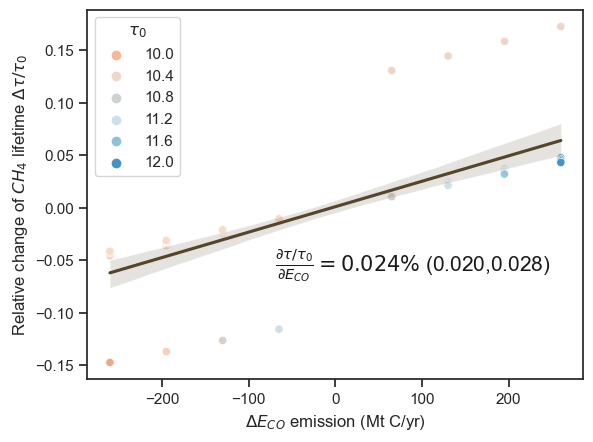

In [30]:
x_list = []
y_list = []
lifetime_0 = []
for k in range(len(NO_emi)):
    for i in range(len(CO_emi)):
        for j in range(len(CO_emi)):
            if not j==i: ##单次比较即可
                x_list.append(CO_emi[j]-CO_emi[i])
                y_list.append((data_matrix[k,j]-data_matrix[k,i])/data_matrix[k,i])
                lifetime_0.append(data_matrix[i,k])

data = {
        'x':x_list,
        'y':y_list,
        '$τ_0$':lifetime_0
    }                
                
fig, ax = plt.subplots()
sns.set_theme(style="ticks")


# sns.scatterplot(x=x_list, y=y_list,hue=lifetime_0)
sns.scatterplot(data=data,x='x', y='y',hue='$τ_0$',palette=newcmp,hue_norm=(9,12))
sns.regplot(x=x_list, y=y_list,ax=ax,scatter_kws={"s":0},
            color='#55462B',
           )
ax.set_xlabel('$\Delta E_{CO}$ emission (Mt C/yr)')
ax.set_ylabel(r'Relative change of $CH_4$ lifetime $\Delta \tau/\tau_0$')

ax.text(-70,-0.06,r'$ \frac {\partial \tau/\tau_0}{\partial E_{CO}}=0.024\%$ (0.020,0.028)',fontsize=15,color='k')

fig.savefig('附件/甲烷/回归CO.pdf',dpi=300)

In [31]:
x = np.array(x_list)
y = np.array(y_list)*100
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           1.20e-19
Time:                        19:29:26   Log-Likelihood:                -253.89
No. Observations:                 100   AIC:                             511.8
Df Residuals:                      98   BIC:                             517.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1083      0.310      0.350      0.7

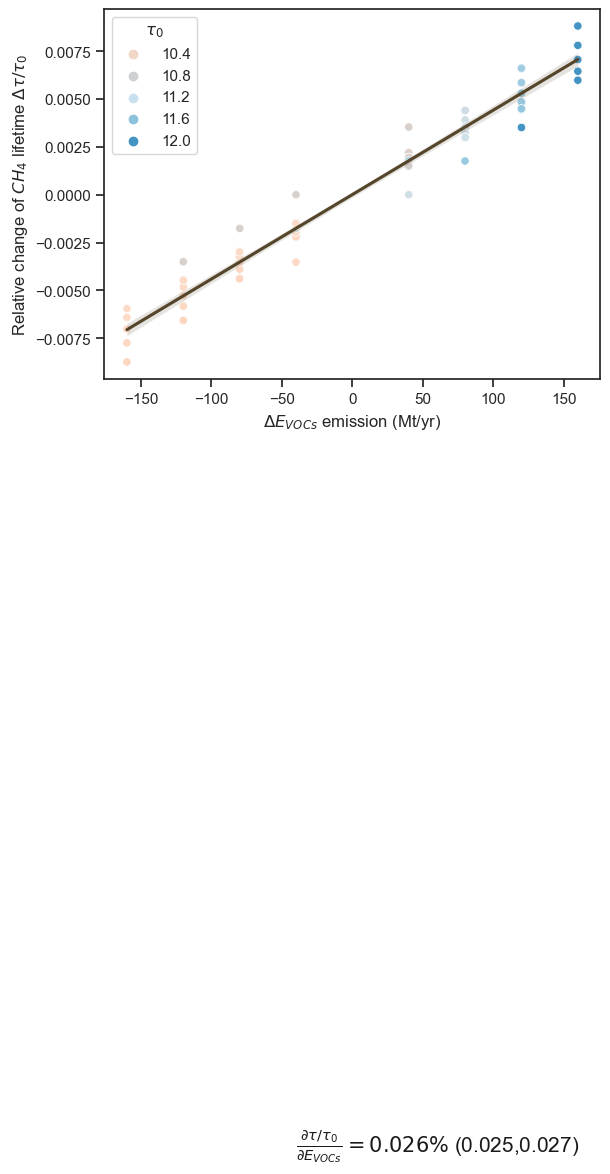

In [32]:
x_list = []
y_list = []
lifetime_0 = []
for k in range(len(NO_emi)):
    for i in range(len(VOC_emi)):
        for j in range(len(VOC_emi)):
            if not j==i: ##单次比较即可
                x_list.append(VOC_emi[j]-VOC_emi[i])
                y_list.append((data_matrix_VOC[k,j]-data_matrix_VOC[k,i])/data_matrix_VOC[k,i])
                lifetime_0.append(data_matrix_VOC[i,k])

data = {
        'x':x_list,
        'y':y_list,
        '$τ_0$':lifetime_0
    }                
                
fig, ax = plt.subplots()
sns.set_theme(style="ticks")


# sns.scatterplot(x=x_list, y=y_list,hue=lifetime_0)
sns.scatterplot(data=data,x='x', y='y',hue='$τ_0$',palette=newcmp,hue_norm=(9,12))
sns.regplot(x=x_list, y=y_list,ax=ax,scatter_kws={"s":0},
            color='#55462B',
           )
ax.set_xlabel('$\Delta E_{VOCs}$ emission (Mt/yr)')
ax.set_ylabel(r'Relative change of $CH_4$ lifetime $\Delta \tau/\tau_0$')

ax.text(-40,-0.05,r'$ \frac {\partial \tau/\tau_0}{\partial E_{VOCs}}=0.026\%$ (0.025,0.027)',fontsize=15,color='k')

fig.savefig('附件/甲烷/回归VOC.pdf',dpi=300)

In [33]:
x = np.array(x_list)
y = np.array(y_list)*100
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2689.
Date:                Sun, 28 Jan 2024   Prob (F-statistic):           4.66e-73
Time:                        19:29:26   Log-Likelihood:                 116.69
No. Observations:                 100   AIC:                            -229.4
Df Residuals:                      98   BIC:                            -224.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.008      0.106      0.9

In [34]:
def f_lifetime(E_NO,E_CO,E_VOC=0):
    return -0.456*E_NO+0.024*E_CO+0.027*E_VOC

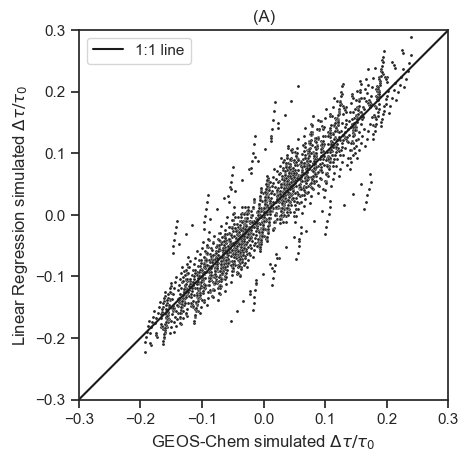

In [41]:
x_list = []
y_list = []
lifetime_0 = []

## 敏感性实验1
for x1 in range(len(NO_emi)):
    for x2 in range(len(NO_emi)):
        for y1 in range(len(CO_emi)):
            for y2 in range(len(CO_emi)):
                if x1==x2 and y1==y2: ## 测试
                    continue
                else:
                    x_list.append(data_matrix[x2,y2]/data_matrix[x1,y1]-1)
                    y_list.append((100+f_lifetime(NO_emi[x2],CO_emi[y2],0))/(100+f_lifetime(NO_emi[x1],CO_emi[y1],0))-1)

# ## 敏感性实验2
for x1 in range(len(NO_emi)):
    for x2 in range(len(NO_emi)):
        for z1 in range(len(VOC_emi)):
            for z2 in range(len(VOC_emi)):
                if x1==x2 and z1==z2: ## 测试
                    continue
                else:
                    x_list.append(data_matrix_VOC[x2,z2]/data_matrix_VOC[x1,z1]-1)
                    y_list.append((100+f_lifetime(NO_emi[x2],0,VOC_emi[z2]))/(100+f_lifetime(NO_emi[x1],0,VOC_emi[z1]))-1)

## 敏感性实验1x2
z1 = 2
y2 = 2
for x1 in range(len(NO_emi)):
    for x2 in range(len(NO_emi)):
        for y1 in range(len(CO_emi)):
            for z2 in range(len(VOC_emi)):
                    x_list.append(data_matrix_VOC[x2,z2]/data_matrix[x1,y1]-1)
                    x_list.append(data_matrix[x1,y1]/data_matrix_VOC[x2,z2]-1)
                    y_list.append((100+f_lifetime(NO_emi[x2],CO_emi[y2],VOC_emi[z2]))/(100+f_lifetime(NO_emi[x1],CO_emi[y1],VOC_emi[z1]))-1)
                    y_list.append((100+f_lifetime(NO_emi[x1],CO_emi[y1],VOC_emi[z1]))/(100+f_lifetime(NO_emi[x2],CO_emi[y2],VOC_emi[z2]))-1)           

x_list = np.array(x_list)
y_list = np.array(y_list)
                    
fig, ax = plt.subplots()
sns.set_theme(style="ticks")
ax.set_xlabel(r'GEOS-Chem simulated $\Delta \tau/\tau_0$')
ax.set_ylabel(r'Linear Regression simulated $\Delta \tau/\tau_0$')
sns.scatterplot(x=x_list,y=y_list, s=5, color=".15")
# sns.histplot(x=x_list, y=y_list,bins=50,pthresh=.1, cmap="mako")


def f_temp(x):
    return (-0.0012+97.6816*x)/100



ax.set_aspect('equal',)

x_max = 0.3

ax.plot([-1*x_max,x_max],[-1*x_max,x_max],color='k',label='1:1 line')
# ax.plot([-1*x_max,x_max],[f_temp(-1*x_max),f_temp(x_max)],color='r',label='$R^2 = 0.980$')

ax.set_xlim([-1*x_max,x_max])
ax.set_ylim([-1*x_max,x_max])

ax.legend()

ax.set_title('(A)')
fig.savefig('附件/甲烷_验证公式.pdf',dpi=300)

In [40]:
x = np.array(x_list)
y = np.array(y_list)*100
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.733e+04
Date:                Sun, 28 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:30:36   Log-Likelihood:                -6450.8
No. Observations:                2450   AIC:                         1.291e+04
Df Residuals:                    2448   BIC:                         1.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0618      0.068      0.907      0.3